In [ ]:
pip install networkx igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 56.2 MB/s eta 0:00:00


In [ ]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_hex
import colorsys
import math
import colorsys
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
# 1. Load Graph
file_path = '/content/grafo_2023.gexf'
print(f"Loading graph from: {file_path}")
nwx = nx.read_gexf(file_path)
graph = ig.Graph.from_networkx(nwx)


degrees = graph.degree()  # Use directed degree for directed graphs
max_degree = max(degrees)
min_degree = min(degrees)

# Normalize node sizes (adjust these values as needed)
# More moderate scaling
#vertex_size = [3 + 50 * (d - min_degree) / (max_degree - min_degree) if max_degree != min_degree else 10 for d in degrees]
vertex_size = [3 + 150 * (d - min_degree) / (max_degree - min_degree) if max_degree != min_degree else 30 for d in degrees]

Loading graph from: /content/grafo_2023.gexf


Detecção de comunidades concluída em 0.03 segundos.
Cálculo do layout concluído em 360.74 segundos.


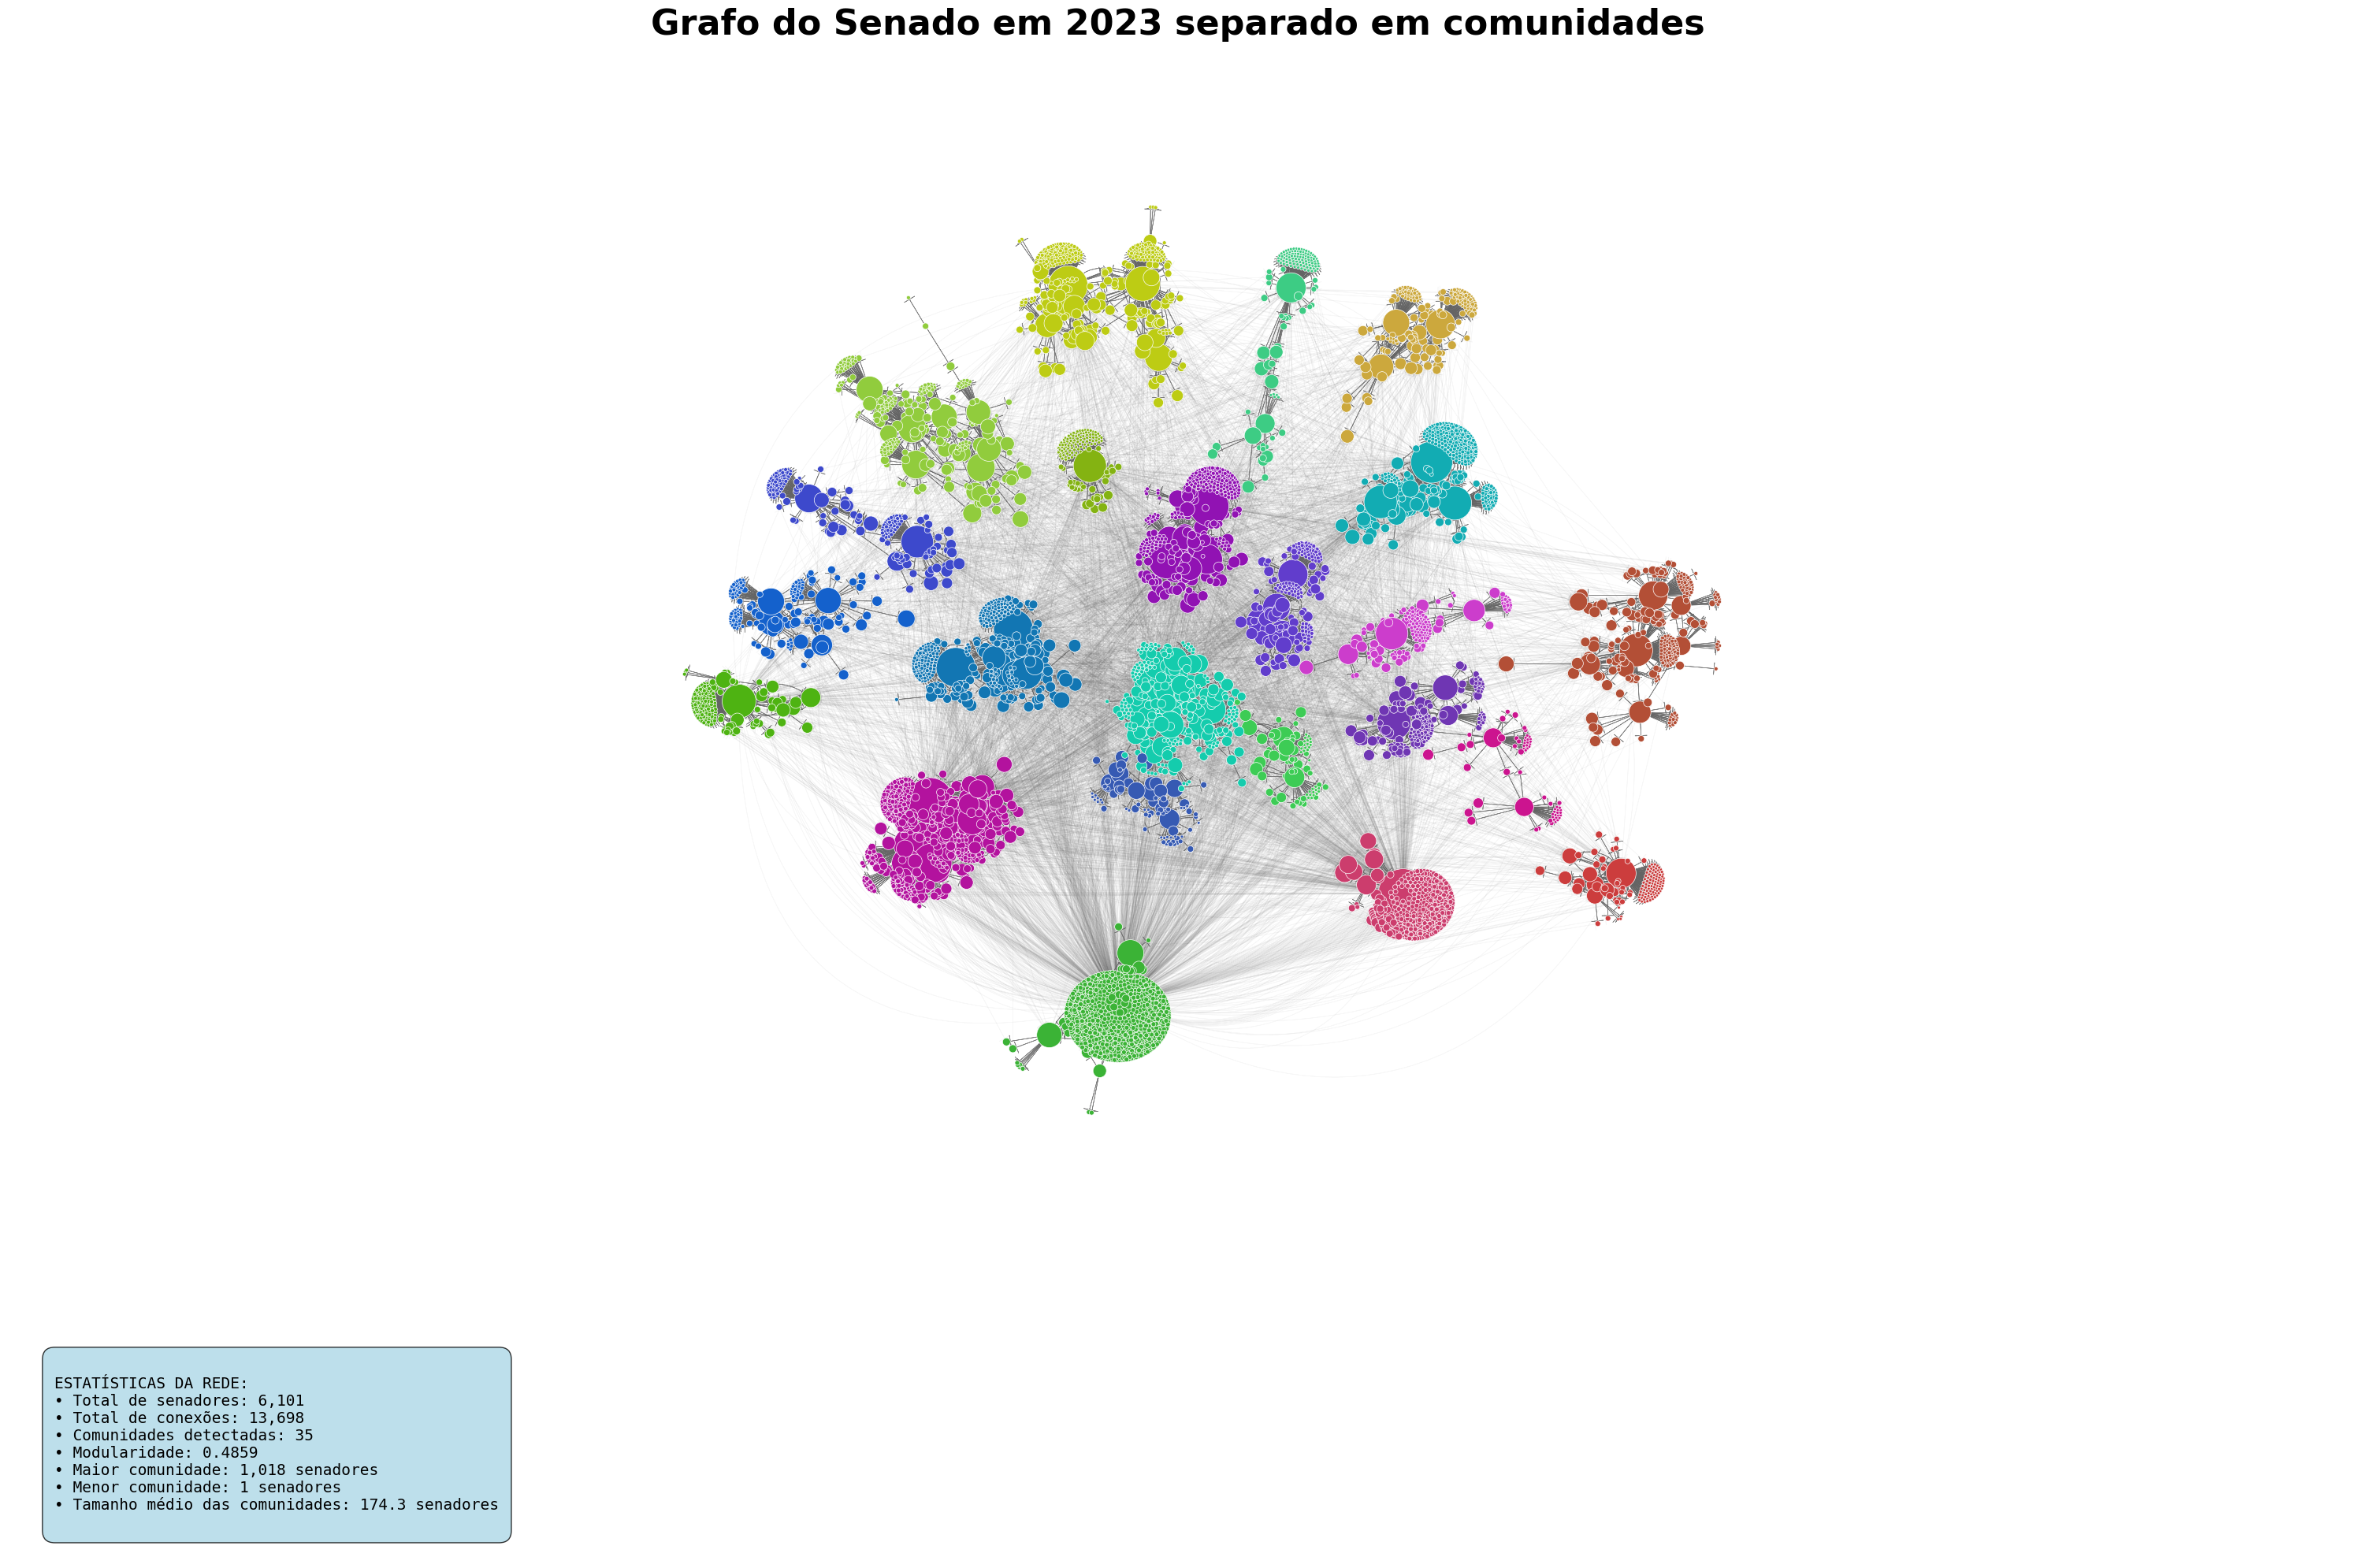

Grafo principal salvo como: grafo_senado_2023_principal.png

=== RANKING DAS COMUNIDADES POR TAMANHO ===
# 1 - Comunidade  8: 1018 senadores - Líderes: Presidente Pacheco (2677), Ministro Fávaro (30), Magno Malta (26)
# 2 - Comunidade  4:  553 senadores - Líderes: Rodrigo Cunha (601), Chico Rodrigues (260), Clodomir Teófilo Girão, (159)
# 3 - Comunidade  9:  474 senadores - Líderes: Senador Veneziano Vital do Rego (1200), Eduardo Riedel (17), Tereza Cristina Corrêa (16)
# 4 - Comunidade 11:  365 senadores - Líderes: Senador Izalci? (353), Leila Maria Moreira Beltrão Pereira (192), Flávio Arns (61)
# 5 - Comunidade 10:  361 senadores - Líderes: Styvenson Valentim (376), Lúcio Rodrigues (371), Presidente Kajuru (124)
# 6 - Comunidade 18:  357 senadores - Líderes: Erbene Maria Grangeiro Girão (577), Senador Seif (164), MECIAS DE JESUS (155)
# 7 - Comunidade 12:  329 senadores - Líderes: Paulo Douglas Almeida de Moraes (431), Senador Weverton (238), Antônio Rogério Magri (102)
# 8 - Comuni

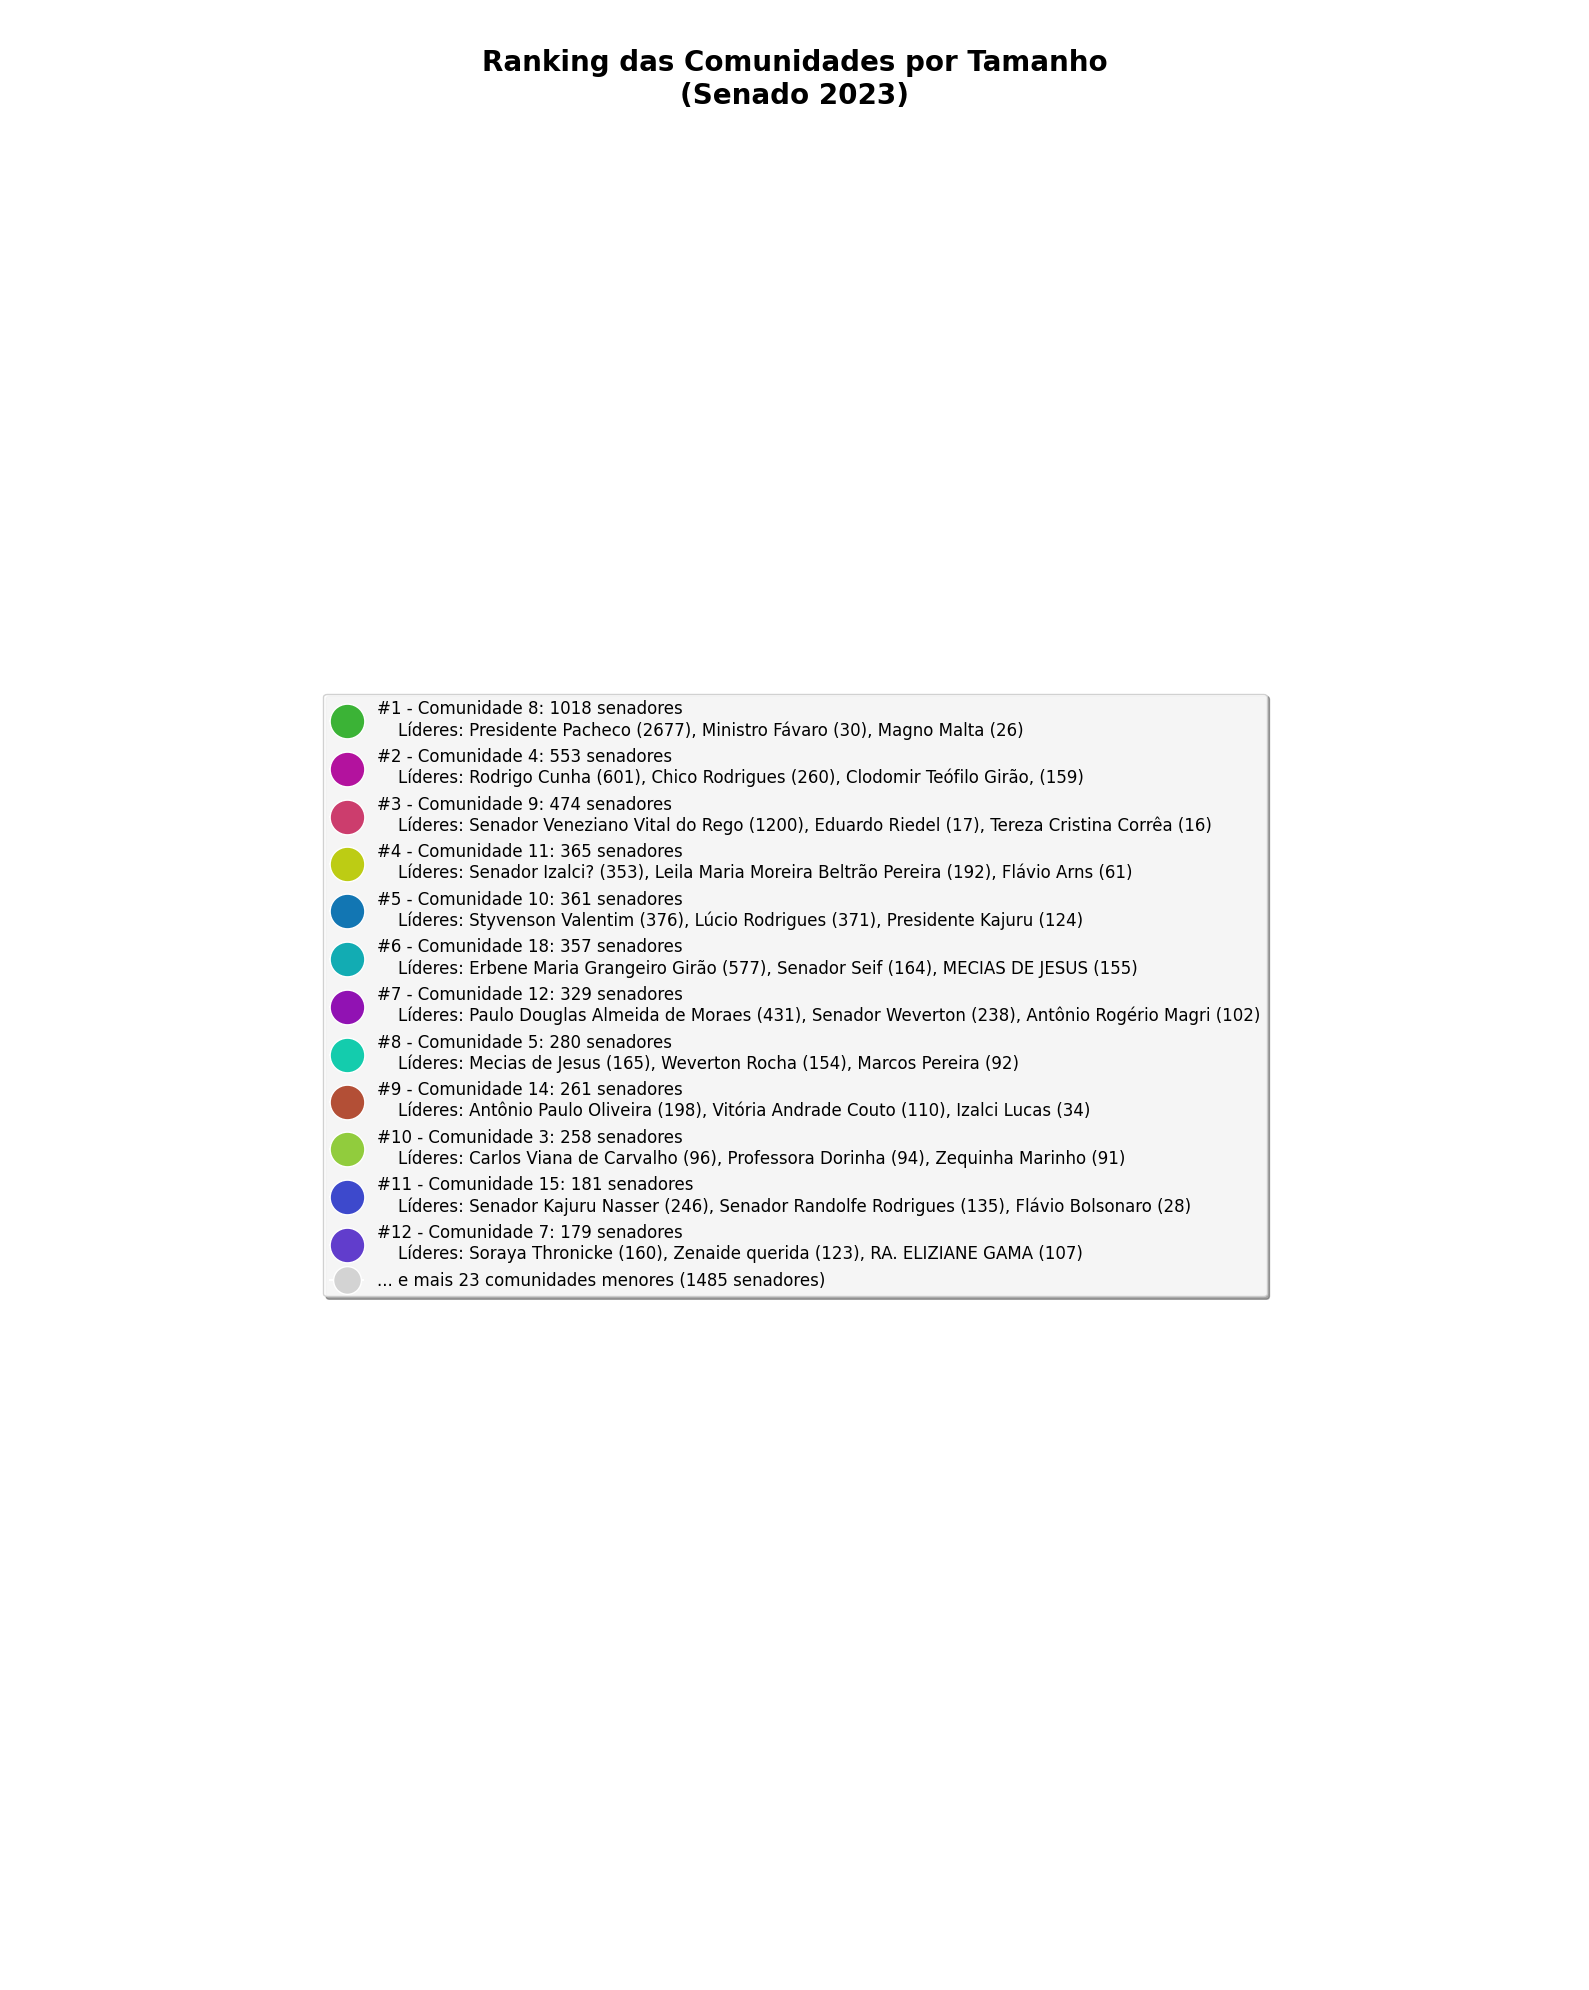

Legenda de ranking salva como: legenda_ranking_comunidades.png


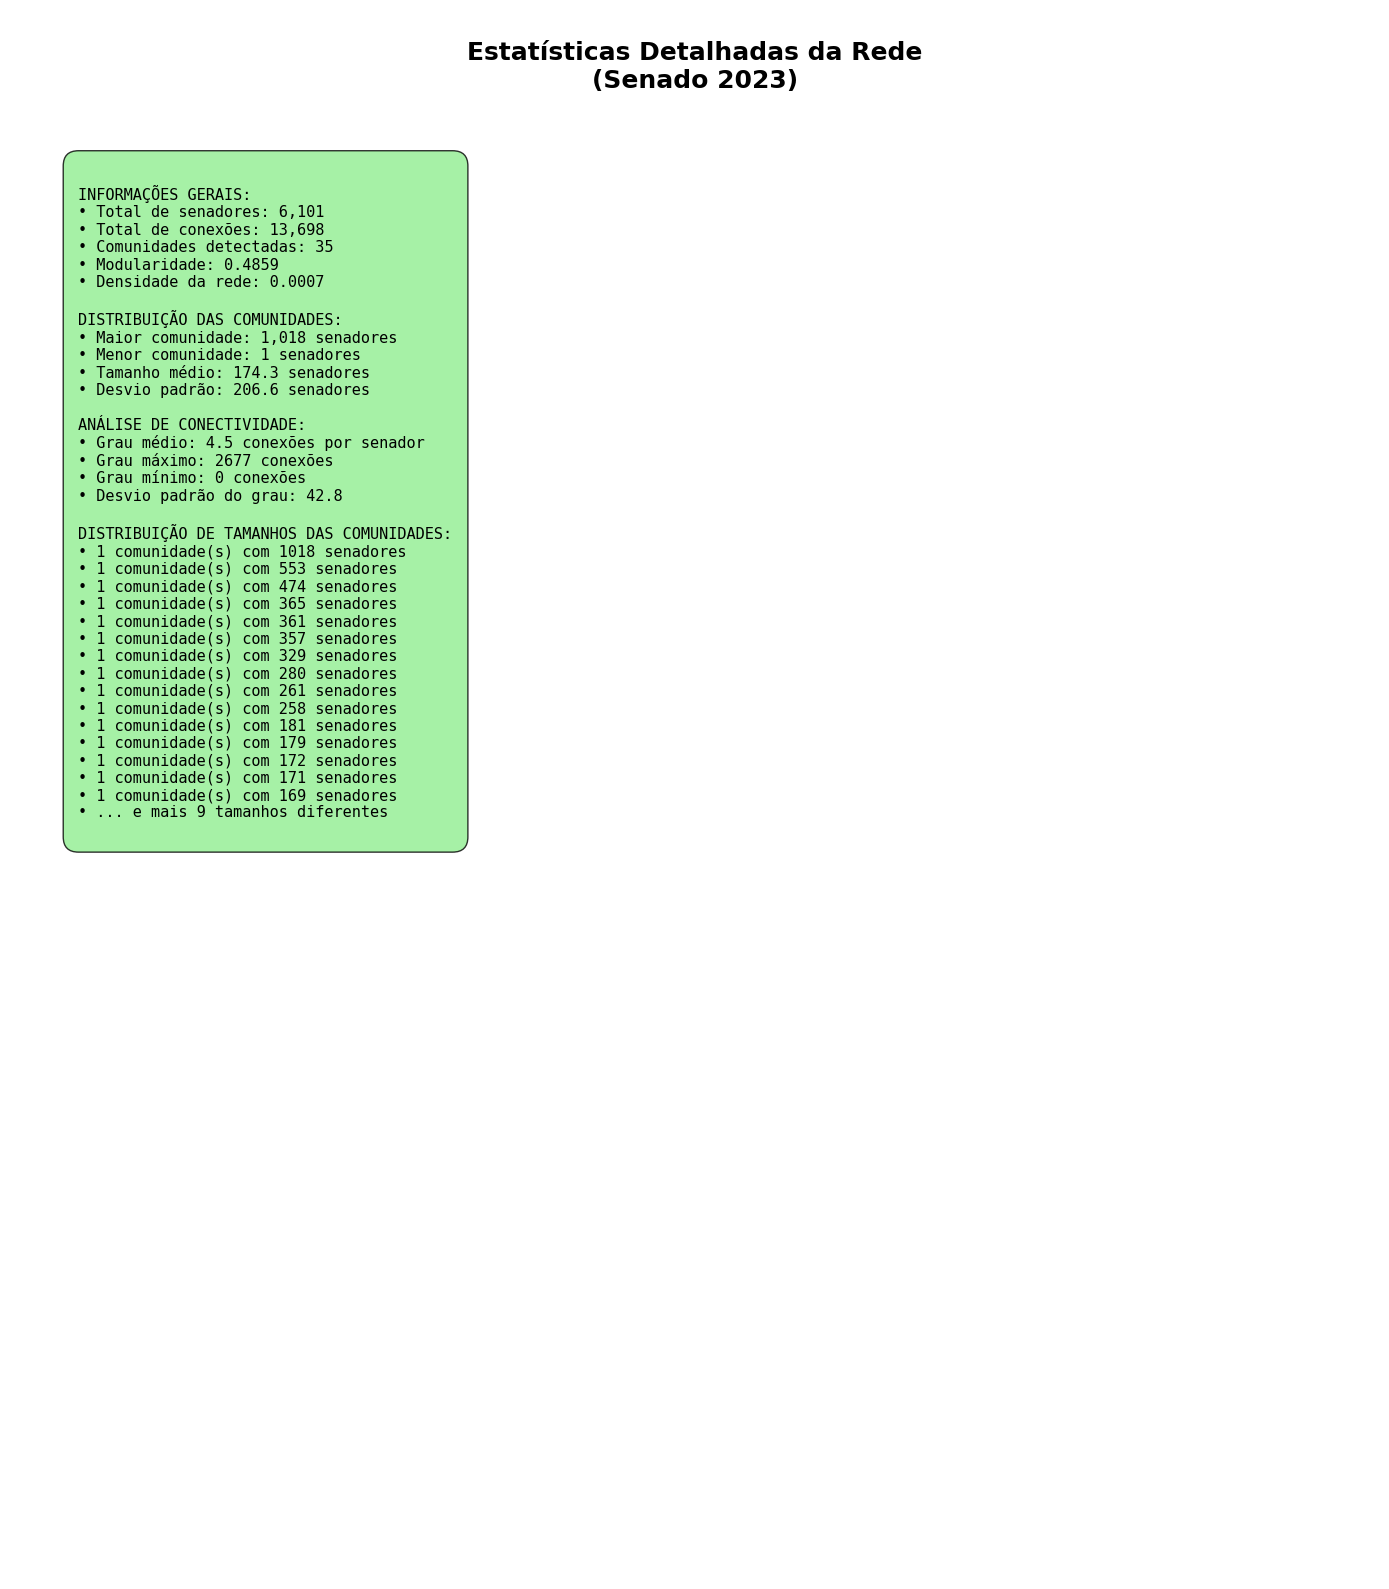

Legenda de estatísticas salva como: legenda_estatisticas_detalhadas.png

Plotagem e salvamento concluídos em 130.43 segundos.

=== ESTATÍSTICAS DETALHADAS ===
Total de senadores: 6,101
Total de conexões: 13,698
Comunidades detectadas: 35
Modularidade: 0.4859
Densidade da rede: 0.0007
Distribuição de tamanhos das comunidades:
  1 comunidade(s) com 1018 senadores
  1 comunidade(s) com 553 senadores
  1 comunidade(s) com 474 senadores
  1 comunidade(s) com 365 senadores
  1 comunidade(s) com 361 senadores
  1 comunidade(s) com 357 senadores
  1 comunidade(s) com 329 senadores
  1 comunidade(s) com 280 senadores
  1 comunidade(s) com 261 senadores
  1 comunidade(s) com 258 senadores
  ... e mais 14 tamanhos diferentes

Arquivos salvos:
1. grafo_senado_2023_principal.png - Grafo principal
2. legenda_ranking_comunidades.png - Legenda de ranking das comunidades
3. legenda_estatisticas_detalhadas.png - Legenda de estatísticas detalhadas


In [ ]:
import time
import math
import colorsys
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np

community_detection_start_time = time.time()
undirected_graph = graph.as_undirected()
communities = undirected_graph.community_multilevel()
num_communities = len(communities)
print(f"Detecção de comunidades concluída em {time.time() - community_detection_start_time:.2f} segundos.")

def get_distinct_colors(n):
    colors = []
    for i in range(n):
        hue = (i * 0.618033988749895) % 1.0  # Golden ratio
        saturation = 0.7 + 0.2 * ((i // 3) % 2)
        value = 0.8 - 0.1 * (i % 2)
        rgb = colorsys.hsv_to_rgb(
            max(0.0, min(1.0, hue)),
            max(0.0, min(1.0, saturation)),
            max(0.0, min(1.0, value))
        )
        colors.append(rgb)
    return colors

palette = get_distinct_colors(num_communities)
vertex_color = [to_hex(palette[membership]) for membership in communities.membership]

community_weights = []
for edge in graph.es:
    src_comm = communities.membership[edge.source]
    tgt_comm = communities.membership[edge.target]
    community_weights.append(15.0 if src_comm == tgt_comm else 0.05)

layout_start_time = time.time()
# Layout aprimorado - abordagem em duas etapas
coarse_layout = graph.layout_fruchterman_reingold(
    niter=500,
    weights=community_weights,
    start_temp=10.0,
    grid=False
)

layout = graph.layout_fruchterman_reingold(
    niter=2000,
    weights=community_weights,
    start_temp=0.1,
    grid=False
)

# Rotacionar o layout 90 graus (horizontal)
rotated_layout = []
for x, y in layout.coords:
    # Rotação de 90 graus no sentido horário: (x, y) -> (y, -x)
    rotated_layout.append([y, -x])

print(f"Cálculo do layout concluído em {time.time() - layout_start_time:.2f} segundos.")

# Dimensionamento dos nós
degrees = graph.degree()
community_sizes = [len(c) for c in communities]
max_comm_size = max(community_sizes)
vertex_size = [
    10 * math.log(d + 1) * (math.log(community_sizes[communities.membership[i]] + 1)/math.log(max_comm_size + 1))
    for i, d in enumerate(degrees)
]

# Coloração das arestas
edge_colors = []
for edge in graph.es:
    src_comm = communities.membership[edge.source]
    tgt_comm = communities.membership[edge.target]
    alpha = 0.8 if src_comm == tgt_comm else 0.05
    edge_colors.append(f"rgba(100,100,100,{alpha})")

# Calcular líderes das comunidades (principais nós por grau em cada comunidade)
community_info = []
for comm_id in range(num_communities):
    # Obter índices dos nós nesta comunidade
    node_indices = [i for i, x in enumerate(communities.membership) if x == comm_id]

    # Obter seus graus e rótulos
    community_degrees = [(i, degrees[i]) for i in node_indices]

    # Ordenar por grau (decrescente) e pegar os 3 principais
    top_nodes = sorted(community_degrees, key=lambda x: x[1], reverse=True)[:3]

    # Obter rótulos para estes nós (assumindo que o grafo tem atributo 'label')
    leaders = []
    for node_idx, degree in top_nodes:
        label = graph.vs[node_idx]['label'] if 'label' in graph.vs.attributes() else f"Nó {node_idx}"
        leaders.append((label, degree))

    community_info.append({
        'id': comm_id,
        'size': len(node_indices),
        'leaders': leaders
    })

# Ordenar comunidades por tamanho (número de nós) - maiores primeiro
community_info_sorted = sorted(community_info, key=lambda x: x['size'], reverse=True)

# Selecionar principais comunidades (ex: top 12 por tamanho)
main_communities = community_info_sorted[:12]
main_communities_ids = [comm['id'] for comm in main_communities]

# Estilo visual
visual_style = {
    "layout": rotated_layout,
    "vertex_size": vertex_size,
    "vertex_color": vertex_color,
    "vertex_frame_width": 0.5,
    "vertex_frame_color": "white",
    "vertex_label": None,
    "edge_width": 0.5,
    "edge_color": edge_colors,
    "bbox": (4000, 3000),  # Ajustado para layout horizontal
    "margin": 200,
    "autocurve": True,
    "edge_arrow_size": 0,
}

# ========== PLOTAGEM DO GRAFO PRINCIPAL (SEM LEGENDA) ==========
output_file_main = "grafo_senado_2023_principal.png"
plotting_start_time = time.time()

# Criar figura com layout horizontal (largura > altura)
fig, ax = plt.subplots(figsize=(30, 20), facecolor="white")
ax.set_facecolor("white")

# Plotar o grafo
ig.plot(graph, target=ax, **visual_style)

# Adicionar título
plt.title("Grafo do Senado em 2023 separado em comunidades",
          fontsize=32, pad=40, fontweight='bold')

# Adicionar estatísticas resumidas na parte inferior
stats_text = f"""
ESTATÍSTICAS DA REDE:
• Total de senadores: {graph.vcount():,}
• Total de conexões: {graph.ecount():,}
• Comunidades detectadas: {num_communities}
• Modularidade: {communities.modularity:.4f}
• Maior comunidade: {max(community_sizes):,} senadores
• Menor comunidade: {min(community_sizes):,} senadores
• Tamanho médio das comunidades: {sum(community_sizes)/len(community_sizes):.1f} senadores
"""

# Adicionar caixa de texto com estatísticas
props = dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.8)
ax.text(0.02, 0.02, stats_text, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=props, fontfamily='monospace')

plt.tight_layout()
plt.savefig(output_file_main, dpi=600, bbox_inches="tight", facecolor='white')
plt.show()
plt.close()

print(f"Grafo principal salvo como: {output_file_main}")

# ========== LEGENDA 1: RANKING DAS COMUNIDADES ==========
output_file_legend1 = "legenda_ranking_comunidades.png"

fig_legend1, ax_legend1 = plt.subplots(figsize=(16, 20), facecolor="white")
ax_legend1.set_facecolor("white")
ax_legend1.axis('off')

# Título da legenda
ax_legend1.text(0.5, 0.98, 'Ranking das Comunidades por Tamanho\n(Senado 2023)',
                horizontalalignment='center', verticalalignment='top',
                fontsize=20, fontweight='bold', transform=ax_legend1.transAxes)

# Preparar elementos da legenda
legend_elements = []
print("\n=== RANKING DAS COMUNIDADES POR TAMANHO ===")

for rank, comm_data in enumerate(main_communities, 1):
    comm_id = comm_data['id']
    comm_size = comm_data['size']
    color = to_hex(palette[comm_id])

    # Criar string com líderes
    leaders_str = ", ".join([f"{label} ({degree})" for label, degree in comm_data['leaders']])

    # Texto da legenda mais informativo
    legend_label = f"#{rank} - Comunidade {comm_id + 1}: {comm_size} senadores\n    Líderes: {leaders_str}"

    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                    label=legend_label,
                                    markerfacecolor=color, markersize=25))

    # Imprimir ranking no console
    print(f"#{rank:2d} - Comunidade {comm_id + 1:2d}: {comm_size:4d} senadores - Líderes: {leaders_str}")

# Adicionar nota se houver mais comunidades
if num_communities > len(main_communities_ids):
    remaining_communities = num_communities - len(main_communities_ids)
    remaining_nodes = sum([comm['size'] for comm in community_info_sorted[12:]])
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                    label=f"... e mais {remaining_communities} comunidades menores ({remaining_nodes} senadores)",
                                    markerfacecolor='lightgray', markersize=20))

# Criar legenda
legend1 = ax_legend1.legend(handles=legend_elements,
                           loc='center',
                           fontsize=12,
                           framealpha=0.9,
                           fancybox=True,
                           shadow=True)

plt.tight_layout()
plt.savefig(output_file_legend1, dpi=600, bbox_inches="tight", facecolor='white')
plt.show()
plt.close()

print(f"Legenda de ranking salva como: {output_file_legend1}")

# ========== LEGENDA 2: ESTATÍSTICAS DETALHADAS ==========
output_file_legend2 = "legenda_estatisticas_detalhadas.png"

fig_legend2, ax_legend2 = plt.subplots(figsize=(14, 16), facecolor="white")
ax_legend2.set_facecolor("white")
ax_legend2.axis('off')

# Título da legenda
ax_legend2.text(0.5, 0.98, 'Estatísticas Detalhadas da Rede\n(Senado 2023)',
                horizontalalignment='center', verticalalignment='top',
                fontsize=18, fontweight='bold', transform=ax_legend2.transAxes)

# Preparar texto de estatísticas detalhadas
detailed_stats = f"""
INFORMAÇÕES GERAIS:
• Total de senadores: {graph.vcount():,}
• Total de conexões: {graph.ecount():,}
• Comunidades detectadas: {num_communities}
• Modularidade: {communities.modularity:.4f}
• Densidade da rede: {(2.0 * graph.ecount()) / (graph.vcount() * (graph.vcount() - 1)):.4f}

DISTRIBUIÇÃO DAS COMUNIDADES:
• Maior comunidade: {max(community_sizes):,} senadores
• Menor comunidade: {min(community_sizes):,} senadores
• Tamanho médio: {sum(community_sizes)/len(community_sizes):.1f} senadores
• Desvio padrão: {np.std(community_sizes):.1f} senadores

ANÁLISE DE CONECTIVIDADE:
• Grau médio: {np.mean(degrees):.1f} conexões por senador
• Grau máximo: {max(degrees)} conexões
• Grau mínimo: {min(degrees)} conexões
• Desvio padrão do grau: {np.std(degrees):.1f}

DISTRIBUIÇÃO DE TAMANHOS DAS COMUNIDADES:
"""

# Adicionar distribuição de tamanhos
size_distribution = {}
for size in community_sizes:
    size_distribution[size] = size_distribution.get(size, 0) + 1

for size in sorted(size_distribution.keys(), reverse=True)[:15]:
    count = size_distribution[size]
    detailed_stats += f"• {count} comunidade(s) com {size} senadores\n"

if len(size_distribution) > 15:
    detailed_stats += f"• ... e mais {len(size_distribution) - 15} tamanhos diferentes\n"

# Adicionar texto de estatísticas
props2 = dict(boxstyle='round,pad=1.0', facecolor='lightgreen', alpha=0.8)
ax_legend2.text(0.05, 0.9, detailed_stats, transform=ax_legend2.transAxes,
                fontsize=11, verticalalignment='top', bbox=props2,
                fontfamily='monospace')

plt.tight_layout()
plt.savefig(output_file_legend2, dpi=600, bbox_inches="tight", facecolor='white')
plt.show()
plt.close()

print(f"Legenda de estatísticas salva como: {output_file_legend2}")

print(f"\nPlotagem e salvamento concluídos em {time.time() - plotting_start_time:.2f} segundos.")

# Imprimir estatísticas detalhadas no console
print(f"\n=== ESTATÍSTICAS DETALHADAS ===")
print(f"Total de senadores: {graph.vcount():,}")
print(f"Total de conexões: {graph.ecount():,}")
print(f"Comunidades detectadas: {num_communities}")
print(f"Modularidade: {communities.modularity:.4f}")
print(f"Densidade da rede: {(2.0 * graph.ecount()) / (graph.vcount() * (graph.vcount() - 1)):.4f}")
print(f"Distribuição de tamanhos das comunidades:")

for size in sorted(size_distribution.keys(), reverse=True)[:10]:
    count = size_distribution[size]
    print(f"  {count} comunidade(s) com {size} senadores")

if len(size_distribution) > 10:
    print(f"  ... e mais {len(size_distribution) - 10} tamanhos diferentes")

print(f"\nArquivos salvos:")
print(f"1. {output_file_main} - Grafo principal")
print(f"2. {output_file_legend1} - Legenda de ranking das comunidades")
print(f"3. {output_file_legend2} - Legenda de estatísticas detalhadas")